# How Elon Musk's tweets affect stock prices?


# Application setup

First of all, let's setup authentication to Twitter API.


In [408]:
import numpy
import tweepy
import pandas
import SECRETS
import re
import matplotlib.pyplot as plt

# Authenticate to Twitter
auth = tweepy.OAuthHandler(SECRETS.API_KEY, SECRETS.API_SECRET_KEY)
auth.set_access_token(SECRETS.ACCESS_TOKEN, SECRETS.ACCESS_SECRET_TOKEN)

api = tweepy.API(auth)

try:
    api.verify_credentials()
    print('Authentication OK')
except:
    print('Error during authentication')


Authentication OK



Everything seems fine, we can proceed to download data.

5 latest tweets:


In [409]:

musk_tweets = api.user_timeline(screen_name='elonmusk',
                                count=5,
                                tweet_mode='extended'
                                )

for tweet in musk_tweets:
     print('------------')
     print("ID: {}".format(tweet.id))
     print(tweet.created_at)
     print(tweet.full_text)


------------
ID: 1395554979851554817
2021-05-21 01:40:10
@teslaownersSV This will actually be able to fly very briefly. I always laughed at flying cars &amp; now making one. Fate 🖤 irony haha.
------------
ID: 1395553735510663169
2021-05-21 01:35:13
@AstroJordy @Tesla We can’t wait to build this crazy truck! It’s a total rethink of vehicle mechanical architecture &amp; production methods, so super hard project, but worthwhile in the end.
------------
ID: 1395552911430619144
2021-05-21 01:31:56
@BTCsessions @TeslaGong @wintonARK Achieving truly decentralized finance – power to the people – is a noble &amp; important goal. 

Layer count depends on projected bandwidth &amp; compute, both rising rapidly, which means single layer network can carry all human transactions in future imo.

For now, Lightning is needed.
------------
ID: 1395474971485376518
2021-05-20 20:22:14
@TeslaGong @wintonARK Ideally 0.1kWh, calculated as total energy used by system divided by max transaction rate
---------


# Downloading tweets

We will download at least 5000 tweets to have reasonable data set.
It is worth mentioning here that the maximum allowed .user_timeline(count=) is 200.


In [410]:

downloaded_tweets = []
last_id = musk_tweets[-1].id

while len(downloaded_tweets)<5000:
    musk_tweets = api.user_timeline(screen_name='elonmusk',
                               count=200,
                               include_rts = False,
                               max_id = last_id - 1,
                               tweet_mode = 'extended'
                               )
    downloaded_tweets.extend(musk_tweets)
    # if len(musk_tweets) == 0:
    #     break
    if len(musk_tweets) != 0:
        last_id = musk_tweets[-1].id
        downloaded_tweets.extend(musk_tweets)
    print('N of tweets downloaded till now {}'.format(len(downloaded_tweets)))

print(len(downloaded_tweets))


N of tweets downloaded till now 370
N of tweets downloaded till now 370
N of tweets downloaded till now 370
N of tweets downloaded till now 370
N of tweets downloaded till now 370
N of tweets downloaded till now 750
N of tweets downloaded till now 1140
N of tweets downloaded till now 1140
N of tweets downloaded till now 1140
N of tweets downloaded till now 1140
N of tweets downloaded till now 1518
N of tweets downloaded till now 1518
N of tweets downloaded till now 1518
N of tweets downloaded till now 1518
N of tweets downloaded till now 1518
N of tweets downloaded till now 1896
N of tweets downloaded till now 1896
N of tweets downloaded till now 1896
N of tweets downloaded till now 1896
N of tweets downloaded till now 1896
N of tweets downloaded till now 1896
N of tweets downloaded till now 1896
N of tweets downloaded till now 1896
N of tweets downloaded till now 1896
N of tweets downloaded till now 1896
N of tweets downloaded till now 1896
N of tweets downloaded till now 1896
N of tw


# Reviewing data


In [411]:

words_in_tweets = {}

for tweet in downloaded_tweets:

    # using regular expression to be exclude all "@#!.?"
    t_words = re.findall(r'\w+', tweet.full_text)

    # adding words counting
    for word in t_words:
        if word in words_in_tweets:
            words_in_tweets[word] += 1
        else:
            words_in_tweets[word] = 1

words_to_work_with = words_in_tweets.copy()



We have dictionary {'word' : times_used}


Let's plot some words


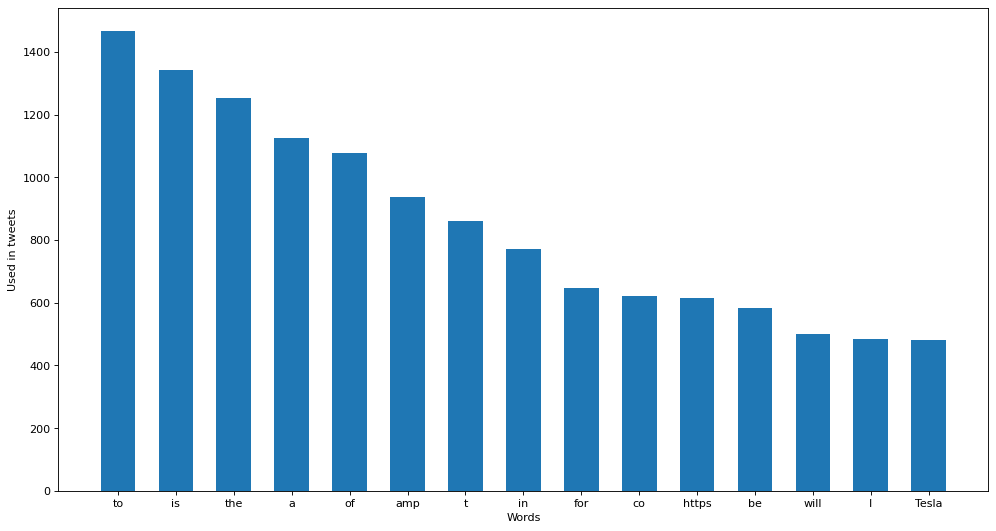

In [412]:

# we don't want to print all words yet, so let's have a look at 30 of them first
df = pandas.DataFrame(words_in_tweets.items(), columns=['word', 'used'])
df.sort_values('used',ascending=False, inplace=True)


fig = plt.figure(figsize=(15, 8), dpi=80)
ax = fig.add_subplot(111)
ax.bar('word', 'used', data=df.iloc[:15], width=0.6)
ax.set_ylabel('Used in tweets')
ax.set_xlabel('Words')
plt.show()



# Improving data quality

 We need to improve quality of our data. Let's delete some unimportant words like "the" "a" "is" etc,
 then print once again

- It is also a good idea to save words_in_tweets to pandas.dataFrame.
- We need to use the field *.created_at* in every tweet we are interested in (*downloaded_tweets*).


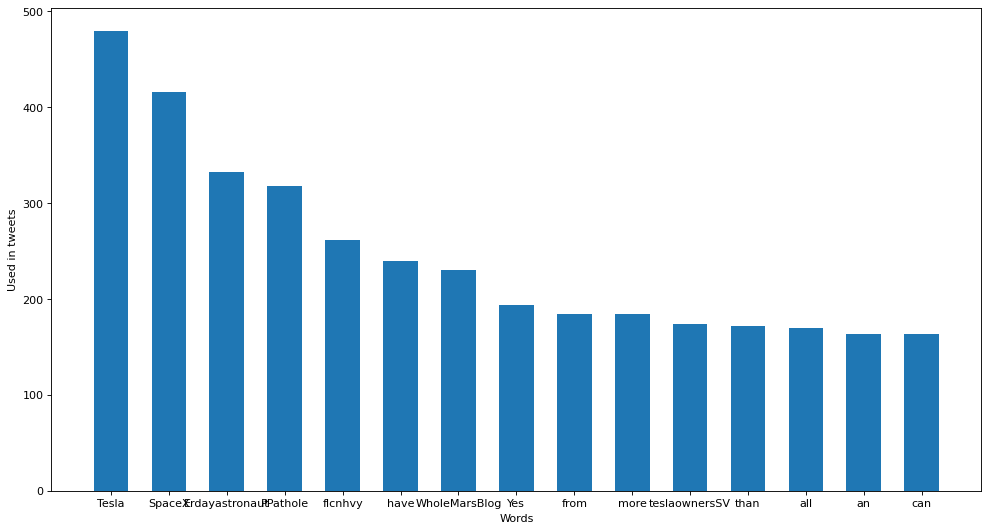

In [413]:

unimportant_words = ['the' ,'a', 'to', 'is', 't', 'of',
                     'be', 'will', 'that', 'this', 'https',
                     'co', 'on', 'we', 'with', 'so', 'for',
                     'at', 'but', 's', 'you', 'was', 'in',
                     'it', 'I', 'or', 'year', 'as', 'are',
                     'no', 'not', 'with', 'This', 'It', 'much',
                     'We', 'do', 'by', 'just', 'The', 'amp'
                     ]
for word in unimportant_words:
    words_to_work_with.pop(word, None)

df = pandas.DataFrame(words_to_work_with.items(), columns=['word', 'used'])
df.sort_values('used',ascending=False, inplace=True)


fig = plt.figure(figsize=(15, 8), dpi=80)
ax = fig.add_subplot(111)
ax.bar('word', 'used', data=df.iloc[:15], width=0.6)
ax.set_ylabel('Used in tweets')
ax.set_xlabel('Words')
plt.show()


In [414]:

# saving our dictionary to DataFrame
words_in_tweets_df = pandas.DataFrame(words_in_tweets.items(), columns=['word', 'used'])

print(words_in_tweets_df.head(15))

# saving downloaded_tweets into a pandas.DataFrame
# firstly, we need to create list  which will help us putting interesting data in df

temp_list_of_dicts = []
for tweet in downloaded_tweets:
    temp_list_of_dicts.append({'id': tweet.id,
                               'text': tweet.full_text,
                               'date': tweet.created_at})

# FILTERING DATA
downloaded_tweets_df = pandas.DataFrame(temp_list_of_dicts)
downloaded_tweets_df['text'] = downloaded_tweets_df['text'].str.lower()

df_tesla_word = downloaded_tweets_df[downloaded_tweets_df['text'].str.contains('tesla', na=False)]

# we have tweets with words tesla or spacex
print(df_tesla_word.shape)


         word  used
0   TeslaGong    24
1   wintonARK    24
2     Bitcoin    36
3     hashing     6
4         aka    10
5      mining    12
6      energy    42
7       usage    12
8          is  1342
9    starting     6
10         to  1468
11     exceed     2
12       that   422
13         of  1078
14     medium     8
(882, 3)



# Downloading historical data of tesla stock prices


Let's check the oldest tweet and download stock data from this day.


In [415]:

# extracting date to string
oldest_tweet_about_tesla_date = str(df_tesla_word.date.iloc[-1])

oldest_tweet_about_tesla_date = oldest_tweet_about_tesla_date.split(' ')

oldest_tweet_about_tesla_date = oldest_tweet_about_tesla_date[0]

oldest_tweet_about_tesla_date = oldest_tweet_about_tesla_date.split('-')

# YEAR MONTH DAY
date_tesla = [int(a) for a in oldest_tweet_about_tesla_date]


In [416]:
# importing important libraries
from datetime import datetime
import yfinance as yahoofinance

In [417]:

# downloading dataframe from Yahoo Finance
start_date = datetime(date_tesla[0], date_tesla[1], date_tesla[2])
end_date = datetime.now()
tesla_stock_prices_data = yahoofinance.download('TSLA', start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed



# Adjusting and merging Dataframes


In [418]:

temp_DF = df_tesla_word.copy()
temp_DF.reset_index(inplace=True)
tweets_dates_list = []

temp_DF = temp_DF.drop(columns=['index', 'id', 'text'])
for row in temp_DF.date:
    tweets_dates_list.append(str(row).split(' ')[0])

# adjusting dataframe and cleaning data
tweets_dates_DF = pandas.DataFrame(data=tweets_dates_list)
tweets_dates_DF.drop_duplicates(inplace=True)
tweets_dates_DF =  tweets_dates_DF[::-1]
tweets_dates_DF.reset_index(inplace=True)
tweets_dates_DF = tweets_dates_DF.drop(columns=['index'])
tweets_dates_DF.columns = ['Date']

prices_data = tesla_stock_prices_data.copy()
prices_data.reset_index(inplace=True)
# changing TimeStamp to str (because tweets_dates_DF.Date is str)
prices_data['Date']= prices_data['Date'].astype(str)

# merging data to print relevant markers in specific dates, dropping useless columns
inner_merged = pandas.merge(tweets_dates_DF, prices_data)
inner_merged = inner_merged.drop(columns=['Open', 'Low', 'Close',
                                          'Adj Close', 'Volume'])
prices_data = prices_data.drop(columns=['Open', 'Low', 'Close',
                                          'Adj Close', 'Volume'])

print(inner_merged.head())
print(prices_data.head())


         Date        High
0  2020-07-06  275.558014
1  2020-07-07  285.899994
2  2020-07-08  283.451996
3  2020-07-09  281.712006
4  2020-07-10  309.783997
         Date        High
0  2020-07-06  275.558014
1  2020-07-07  285.899994
2  2020-07-08  283.451996
3  2020-07-09  281.712006
4  2020-07-10  309.783997



# Plotting stock prices with tweet days markers


<ipython-input-443-9cf13b09b4e6>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  stock_price.set_xticklabels(prices_data.Date)
<ipython-input-443-9cf13b09b4e6>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  musk_twitter_act = stock_fig.add_subplot(111)


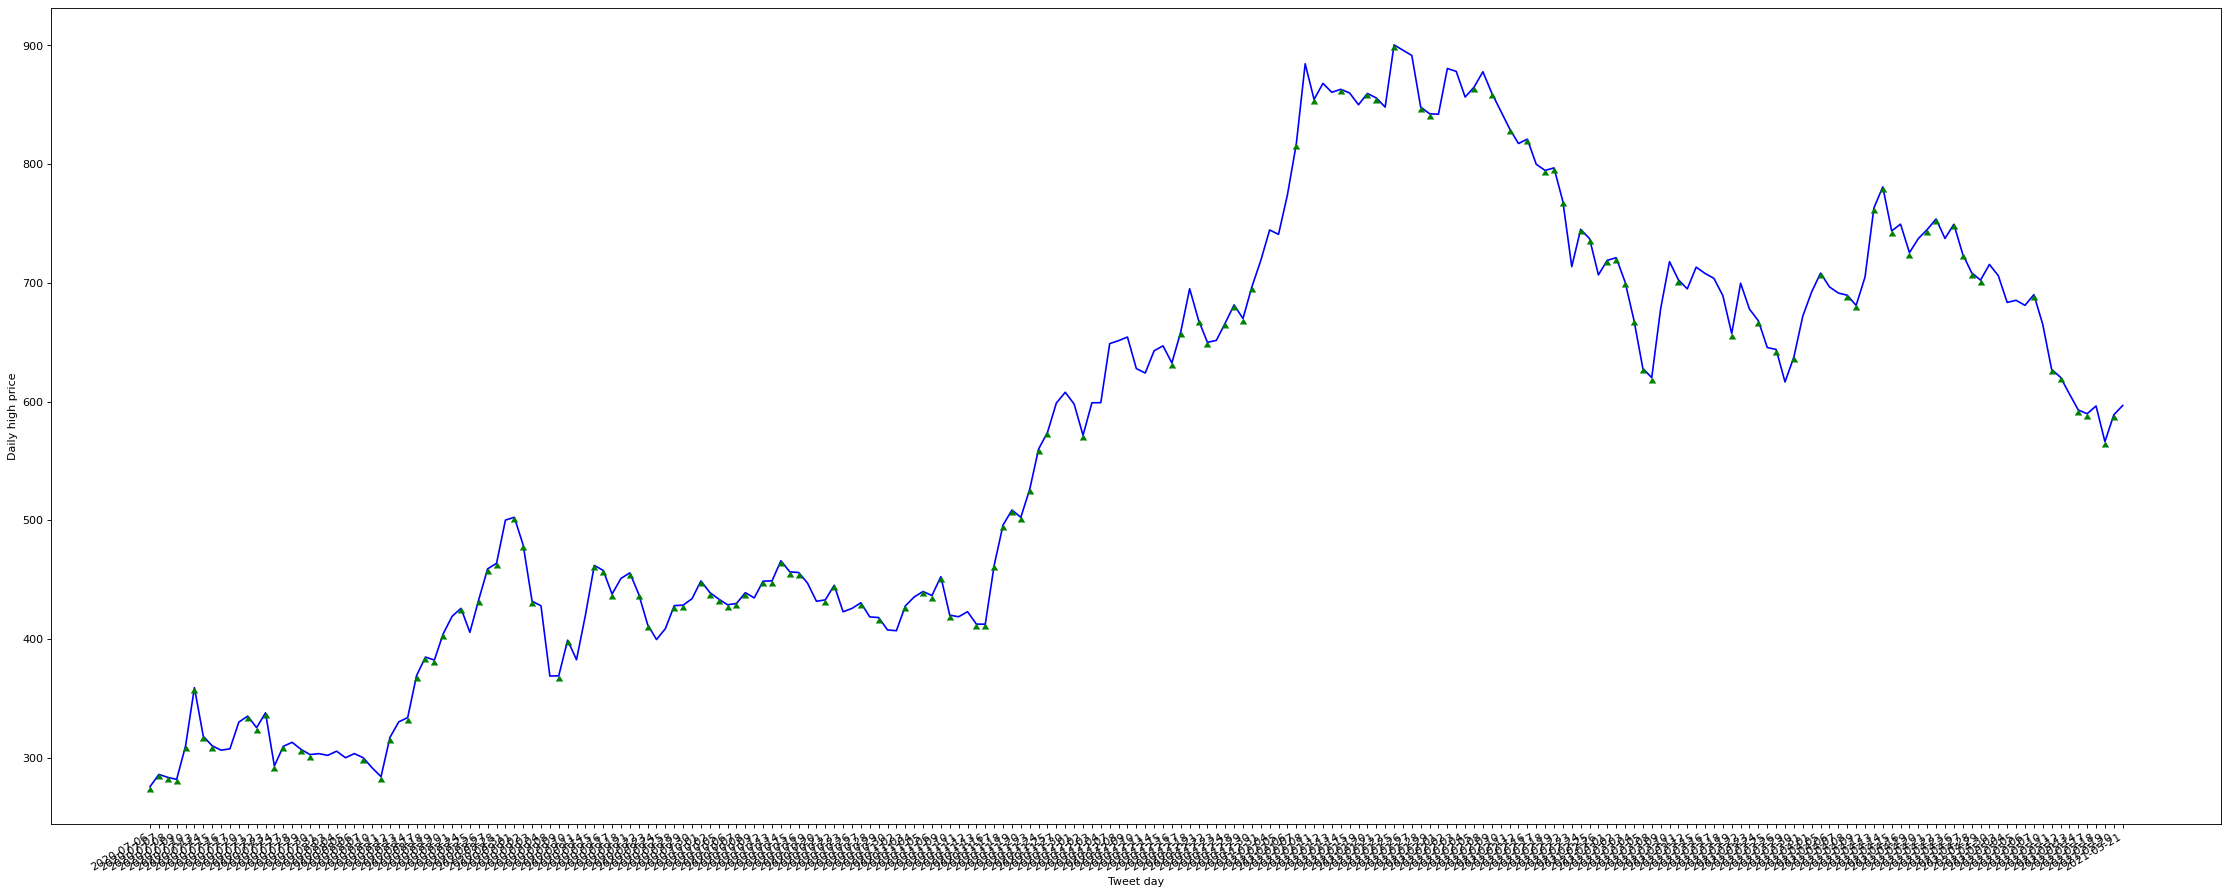

<Figure size 432x288 with 0 Axes>

In [443]:

stock_fig = plt.figure(figsize=(35, 15), dpi=80)


stock_price = stock_fig.add_subplot(111)
stock_price.set_xticklabels(prices_data.Date)
stock_price.xaxis_date()
stock_price.plot(prices_data.Date,
                 prices_data.High,
                 color='b'
                 )
stock_price.set_ylabel('Daily high price')
stock_price.set_xlabel('Date')

musk_twitter_act = stock_fig.add_subplot(111)
musk_twitter_act.xaxis_date()
musk_twitter_act.plot(inner_merged.Date, inner_merged.High,
                      marker=6, color='g', linestyle = 'None'
                      )
musk_twitter_act.set_xlabel('Tweet day')

stock_fig.autofmt_xdate()
plt.show()


# First analysis

At this point we can draw some conclusions, but firstly - let's think about the correlation between the tweet and the
stock price. To explore this we can check the high price of the Tesla stock the day after the tweet.


In [437]:

# for row in inner_merged.Date:
#     print(prices_data[prices_data['Date'] == row])


         Date        High
0  2020-07-06  275.558014
         Date        High
1  2020-07-07  285.899994
         Date        High
2  2020-07-08  283.451996
         Date        High
3  2020-07-09  281.712006
         Date        High
4  2020-07-10  309.783997
         Date        High
5  2020-07-13  358.997986
         Date   High
6  2020-07-14  318.0
         Date   High
7  2020-07-15  310.0
          Date   High
11  2020-07-21  335.0
          Date        High
12  2020-07-22  325.283997
          Date        High
13  2020-07-23  337.799988
          Date   High
14  2020-07-24  293.0
          Date        High
15  2020-07-27  309.588013
          Date        High
17  2020-07-29  306.962006
          Date       High
18  2020-07-30  302.64801
          Date        High
24  2020-08-07  299.950012
          Date   High
26  2020-08-11  284.0
          Date   High
27  2020-08-12  317.0
          Date       High
29  2020-08-14  333.76001
          Date        High
30  2020-08-17  369.171997



# Summarization

The graph displays the stock price of Tesla as a function of time.
The days when Elon tweeted were marked with dots.
There is an equal number of dots preceding an ascending, as there are a descending slope.
Therefore, we cannot draw the conclusion that Elon's tweets influence the stock prices.

